# MC-Analyzer Example Notebook

<center><table>
<tr>
<td><b><a href="https://github.com/l-althueser">Lutz Althüser</a></b></td>
<td><b>Updated 20/02/2017</b></td>
</tr>
</table></center>

This notebook is a collection of examples for the [MC-Analyzer](https://github.com/l-althueser/MC-Analyzer).

In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<center><table>
<tr>
<td><b><a href="javascript:code_toggle()">code cells on/off</a></b></td>
</tr>
</table></center>''')

code cells on/off


## Installation Prerequisites

A [Anaconda3](https://www.continuum.io/downloads) installation with [ROOT 6](https://root.cern.ch/)/[pyROOT](https://root.cern.ch/pyroot) is needed to run this notebook. Alternatively a [pax](https://github.com/XENON1T/pax) environment can be used. The scripts can also be executed with a normal [ROOT 6](https://root.cern.ch/) installation in the C++ way if nothing of the previous options a valid choice.

## Get the Code from GitHub

The code used in this notebook can be downloaded with:
```
git clone https://github.com/l-althueser/MC-Analyzer
```

## Import all needed libaries and define some useful functions

In [22]:
%reset -f

notebook_name = 'MC-Analyzer_example'
dir_save_plot = './'+notebook_name

import os
cur_dir = os.getcwd()
sub_dir = '/'.join(os.getcwd().split('/')[:-1])

import ROOT
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.core.display import Image
from IPython.display import Image, display, HTML, Javascript

import collections
binning = collections.namedtuple('Bins', 'z r rr')

import logging
logging.getLogger('rootpy.stl').setLevel(logging.CRITICAL)
logging.basicConfig(level=logging.CRITICAL)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rc('font', size=16)
plt.rcParams['figure.figsize'] = (12.0, 10.0)
canvas_x = 1920
canvas_y = 1080

# center plots in output
CSS = """
.output_png img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
"""
HTML('<style>{}</style>'.format(CSS))

if not os.path.exists(dir_save_plot):
    os.makedirs(dir_save_plot)

def save_notebook():
    return display(Javascript("IPython.notebook.save_notebook()"),
                   include=['application/javascript'])

# use `output_HTML(notebook_name)` to save as HTML
def output_HTML(read_file):
    save_notebook()
    time.sleep(3)
    if Path(read_file+'.ipynb').is_file():
        print('Save notebook to: '+read_file+'_<date>.html')
        os.system('jupyter nbconvert --to html '+read_file+'.ipynb')
        os.system('mv '+read_file+'.html '+read_file+'_$(date +"%Y%m%d-%H%M%S").html')

print('Initialized with notebook name: ' + notebook_name)

def show(images, title='', align='row'):
    "This function shows given png files (or generate them first from a ROOT.TCanvas)"
    if type(images) is ROOT.TCanvas:
        images.SaveAs(dir_save_plot+'/'+images.GetName()+'.png');
        images = [dir_save_plot+'/'+images.GetName()+'.png']
        nb_images = len(images)
    elif type(images) is str:
        images = [images]
        nb_images = len(images)
    elif type(images) is list: 
        nb_images = len(images)
        for i in range(nb_images):
            if type(images[i]) is ROOT.TCanvas:
                images[i].SaveAs(dir_save_plot+'/'+images[i].GetName()+'.png');
                images[i] = dir_save_plot+'/'+images[i].GetName()+'.png'
            elif type(images[i]) is not str:
                raise TypeError('Only "ROOT.TCanvas" and "str" or lists of both are supported.')
    else:
        raise TypeError('Only "ROOT.TCanvas" and "str" or lists of both are supported.')

    if align == 'row':
        fig = plt.figure(figsize = (60,24))
        for i in range(nb_images):
            fig.add_subplot(1,nb_images,i+1)
            image = mpimg.imread(images[i])
            plt.imshow(image)
            plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.suptitle(title, fontsize=100)
    elif align == 'column':
        for img in images:
            display(Image(img))
    else:
        raise ValueError('Align value """'+align+'""" is not supported.')
        
def remove_compiled(path):
    for root, dirs, files in os.walk(path):
        for currentFile in files:
            exts = ('.pcm', '.d')
            if any(currentFile.lower().endswith(ext) for ext in exts):
                #print('Remove: '+currentFile)
                os.remove(os.path.join(root, currentFile))

Initialized with notebook name: MC-Analyzer_example


Quick example of the `Show()` function which can be used to save and show ROOT plots in an easy way (even if the ROOT inline output is not working):

In [ ]:
c_example = ROOT.TCanvas('example_canvas_save_name', 'Example Canvas',
                         canvas_x, canvas_y)
f_example = ROOT.TF1('f_example', 'abs(sin(x)/x)', 0, 15)
f_example.Draw()
show(c_example)

## Use the MC-Analyzer

The MC-Analyzer can be used with a local ROOT installation. Therefore just `cd` to the top dir and type:
```
root
.x MC-Analyzer.cc+
```
Alternatively you can use a jupyter notebook and follow the given instructions.

In case of any ROOT error during the execution in this notebook do one of the following options:
* Restart the Kernel and reload all cells (or reload first cell which has the `%reset` magic)
* `%reset_selective` the Kernel variables and assign again all variables (check with `who_ls`)

**You have to restart the Kernel if the code of a previous used macro has changed!** (Maybe I will find the reason for this ..)

In [92]:
ROOT.gROOT.Reset()
%reset_selective -f ROOT
import ROOT 
remove_compiled('../')

# optPhot S1 analysis

You can choose from the following output files (`*.png`) or load the `*_S1.root` file for more plots:  

| vs. | xy | rrZ |    
|----|----|----|  
| `*_S1_LCErr.png` | `*_S1_xy_LCE.png`        | `*_S1_rrZ_gen.png`        |  
| `*_S1_LCEz.png`  | `*_S1_xy_LCE_top.png`    | `*_S1_rrZ_det.png`        |  
| `*_S1_rLCEz.png` | `*_S1_xy_LCE_bottom.png` | `*_S1_rrZ_det_top.png`    |  
|                  |                          | `*_S1_rrZ_det_bottom.png` |    
|                  |                          | `*_S1_rrZ_LCE.png`        |  
|                  |                          | `*_S1_rrZ_LCE_top.png`    |  
|                  |                          | `*_S1_rrZ_LCE_bottom.png` |   
|                  |                          | `*_S1_rrZ_rLCE.png`       |  
|                  |                          | `*_S1_rrZ_rLCE_top.png`   |  
|                  |                          | `*_S1_rrZ_rLCE_bottom.png`|  
|                  |                          | `*_S1_rrZ_rLCE_3D.png`    |  


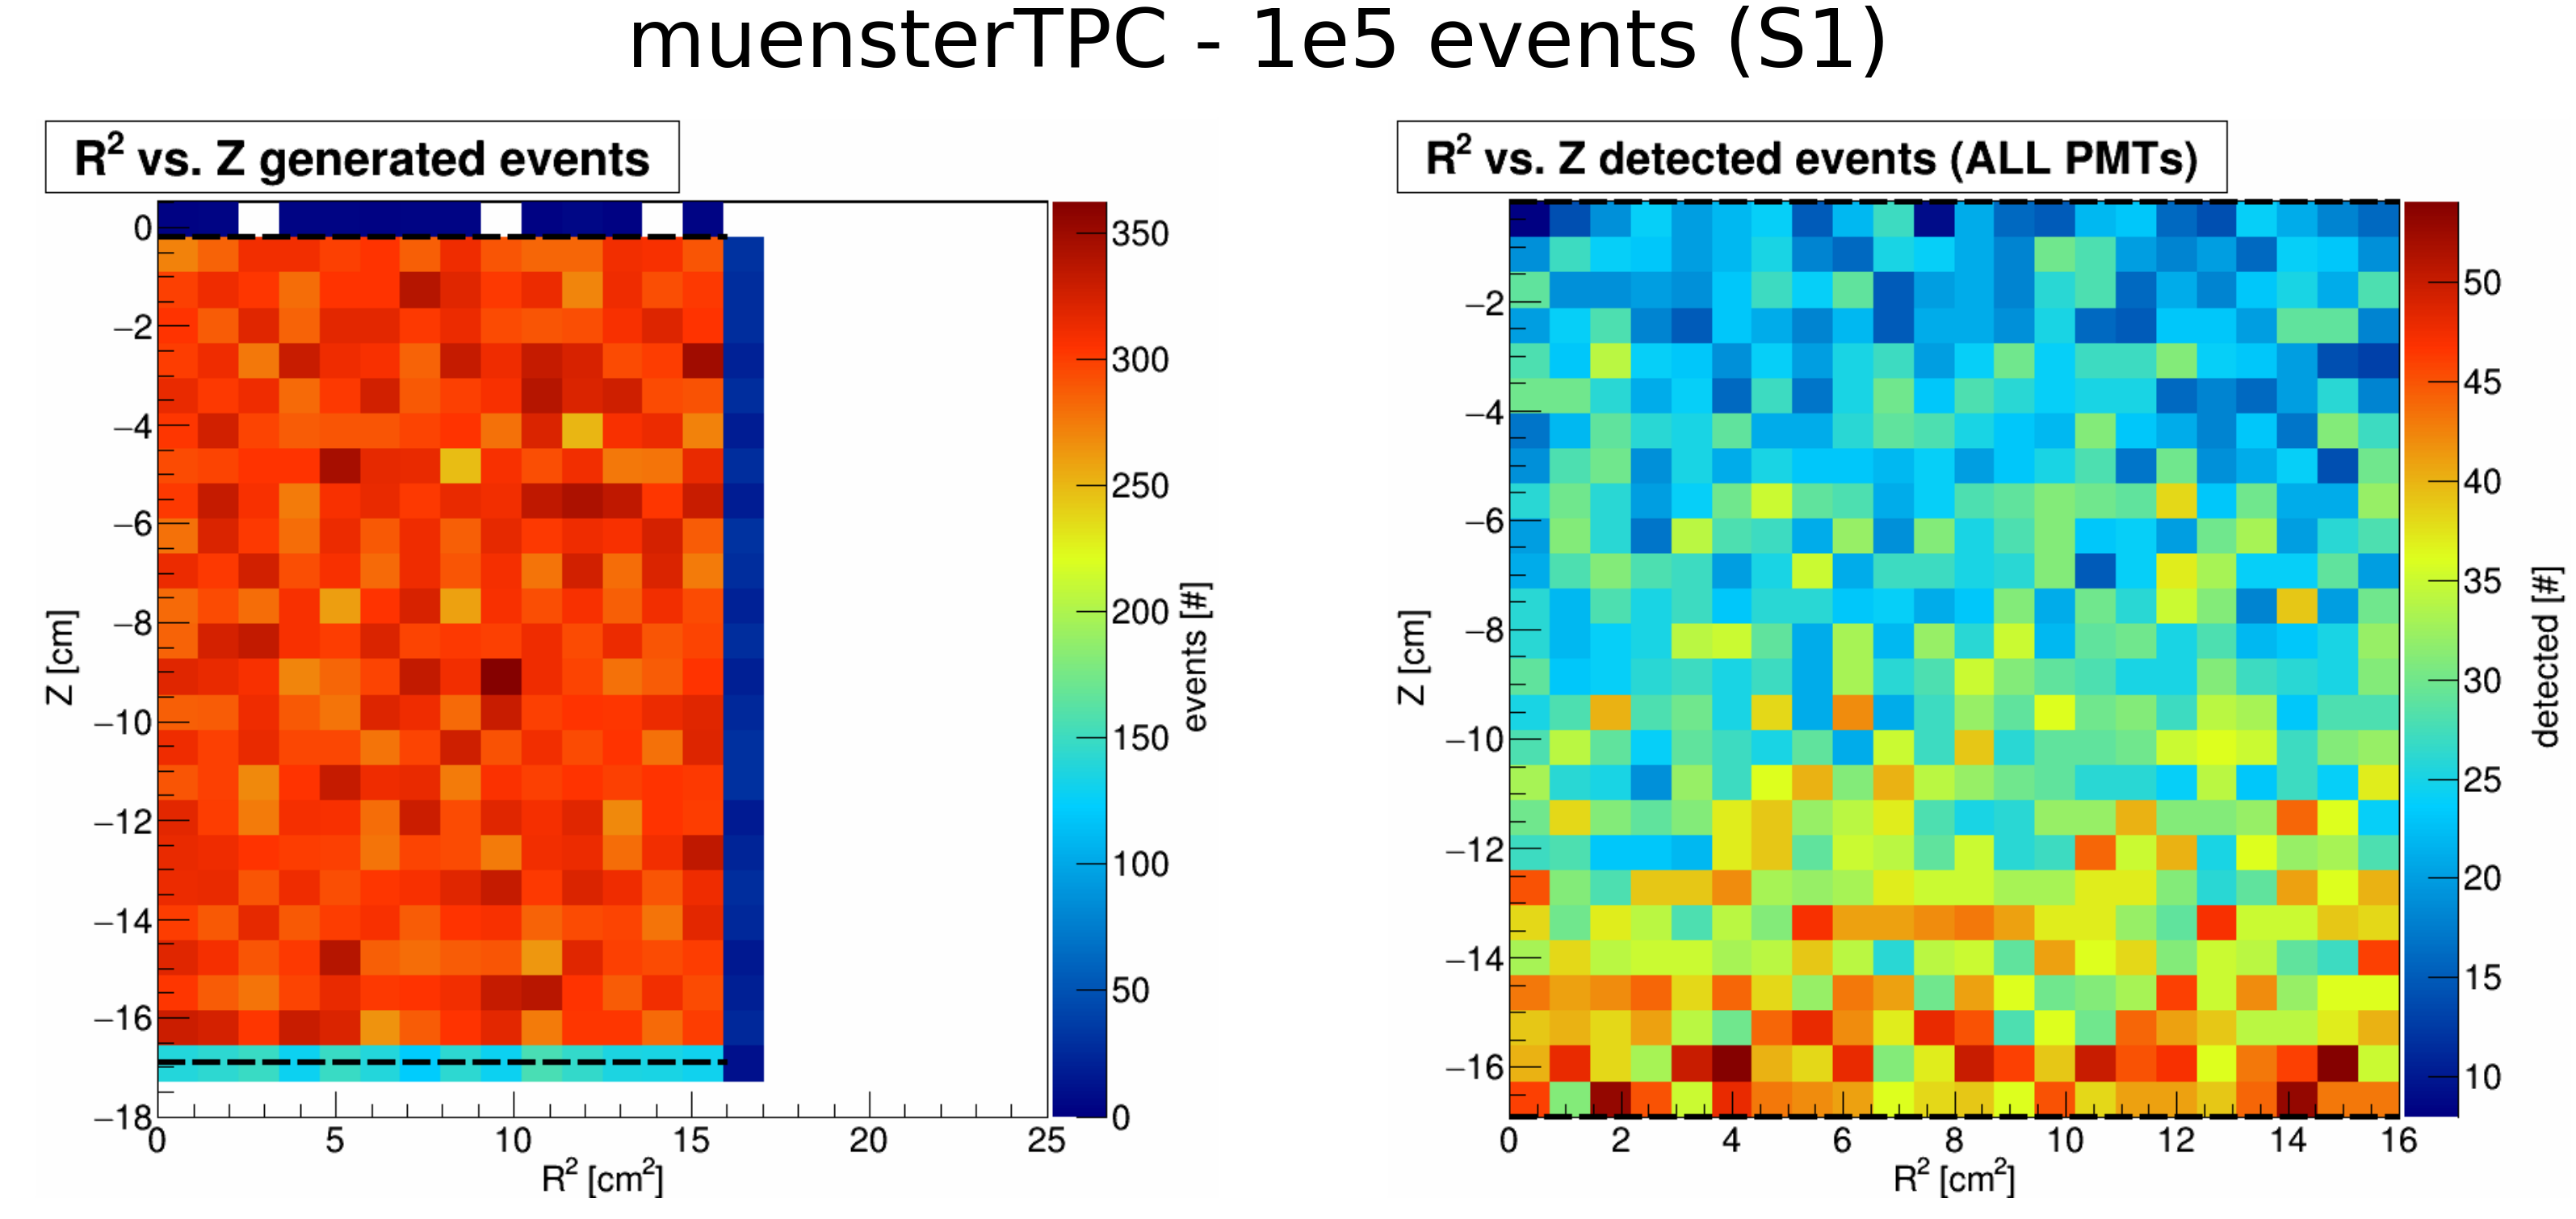

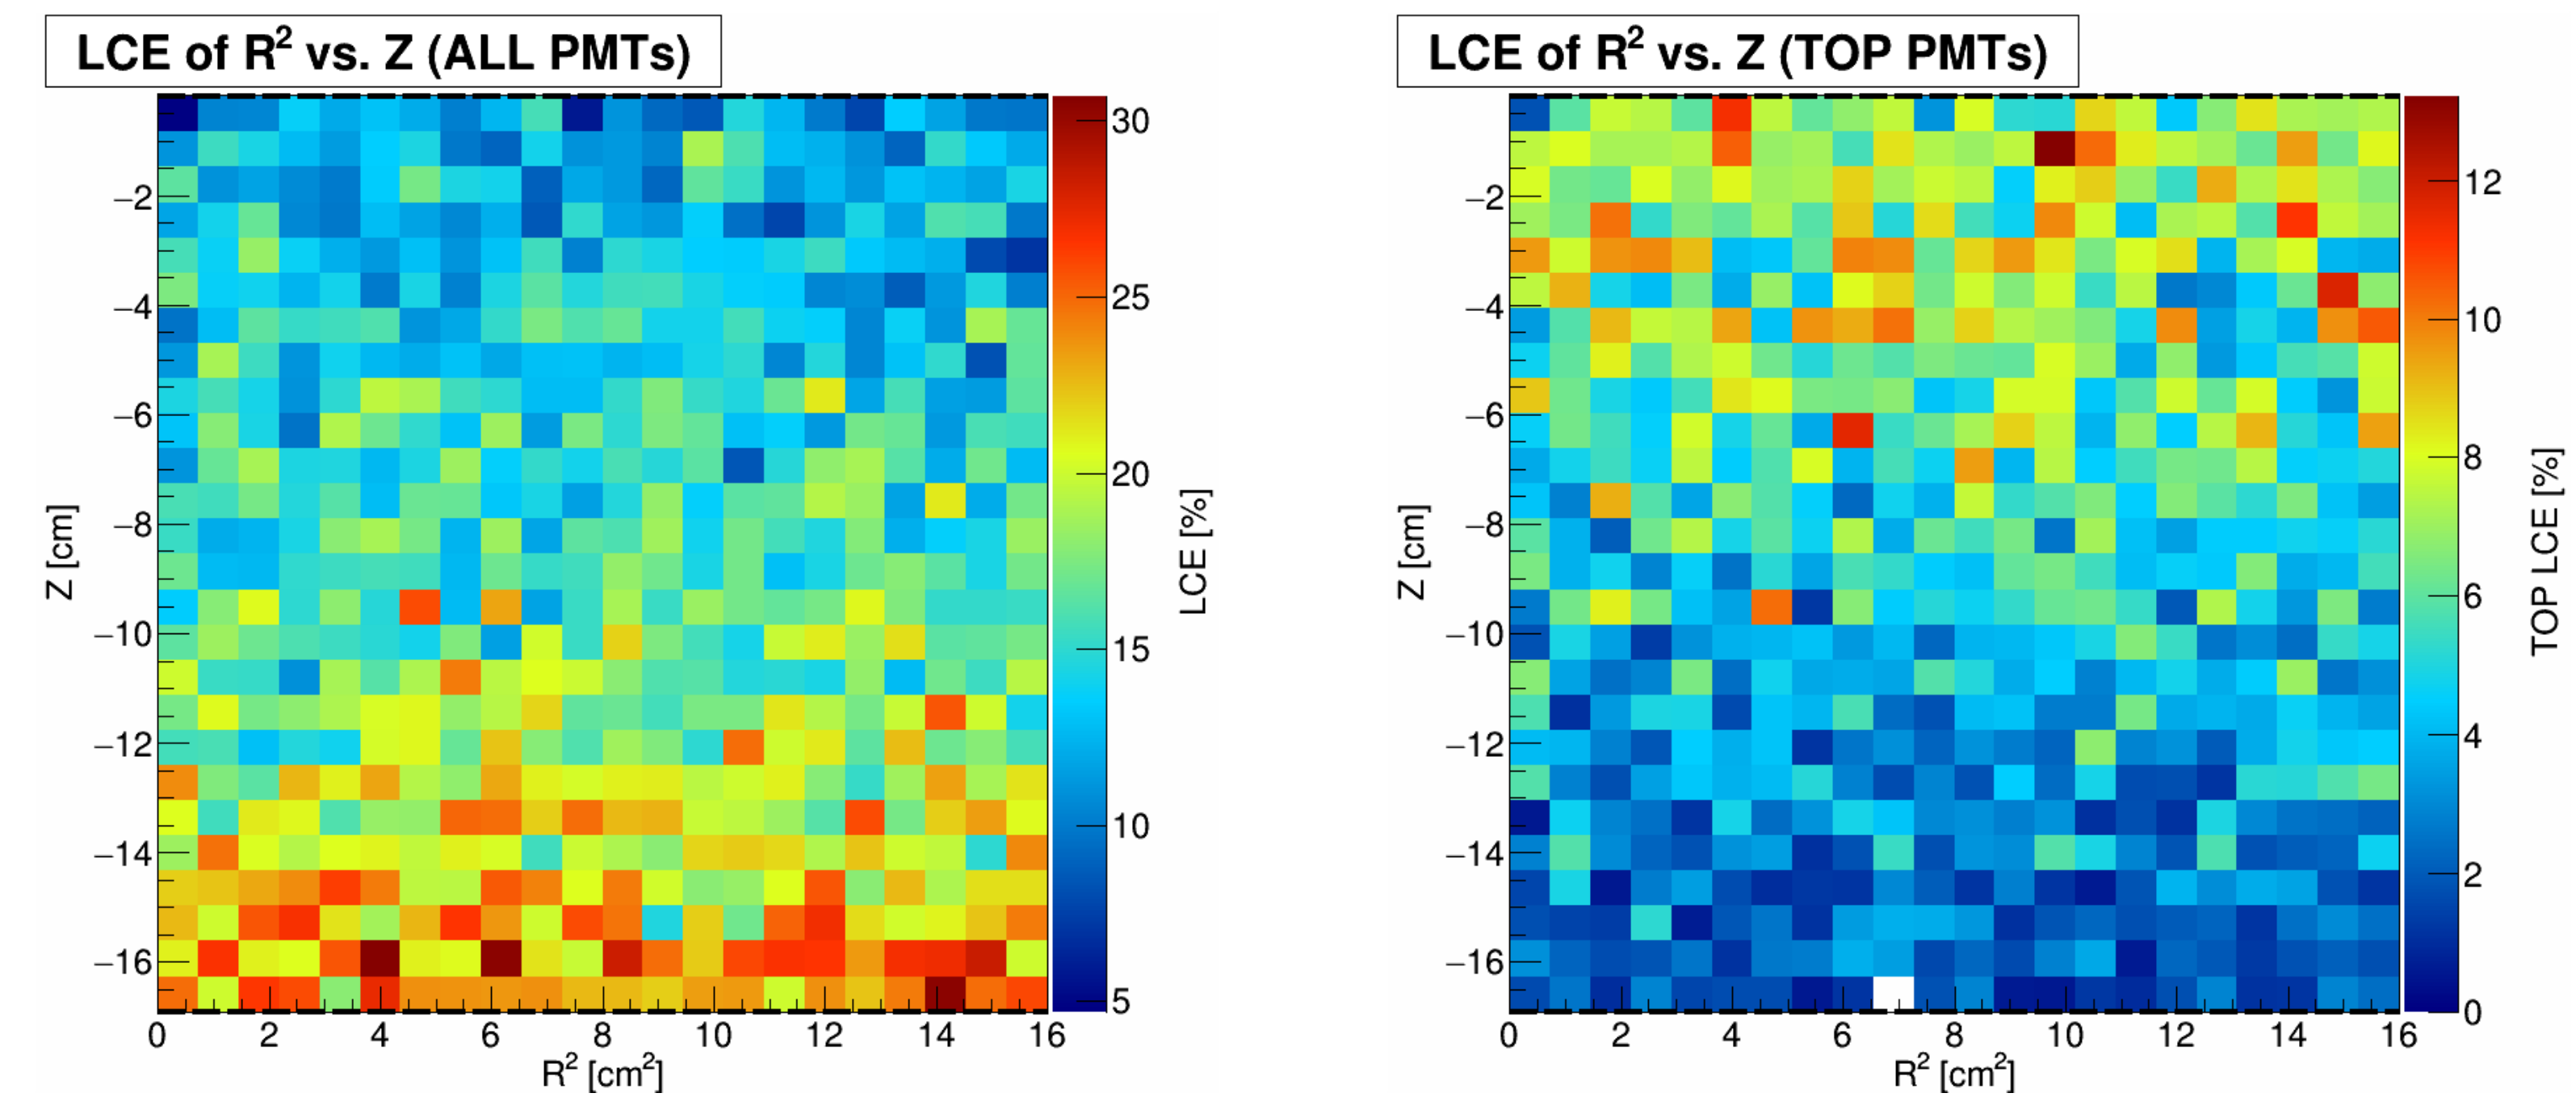

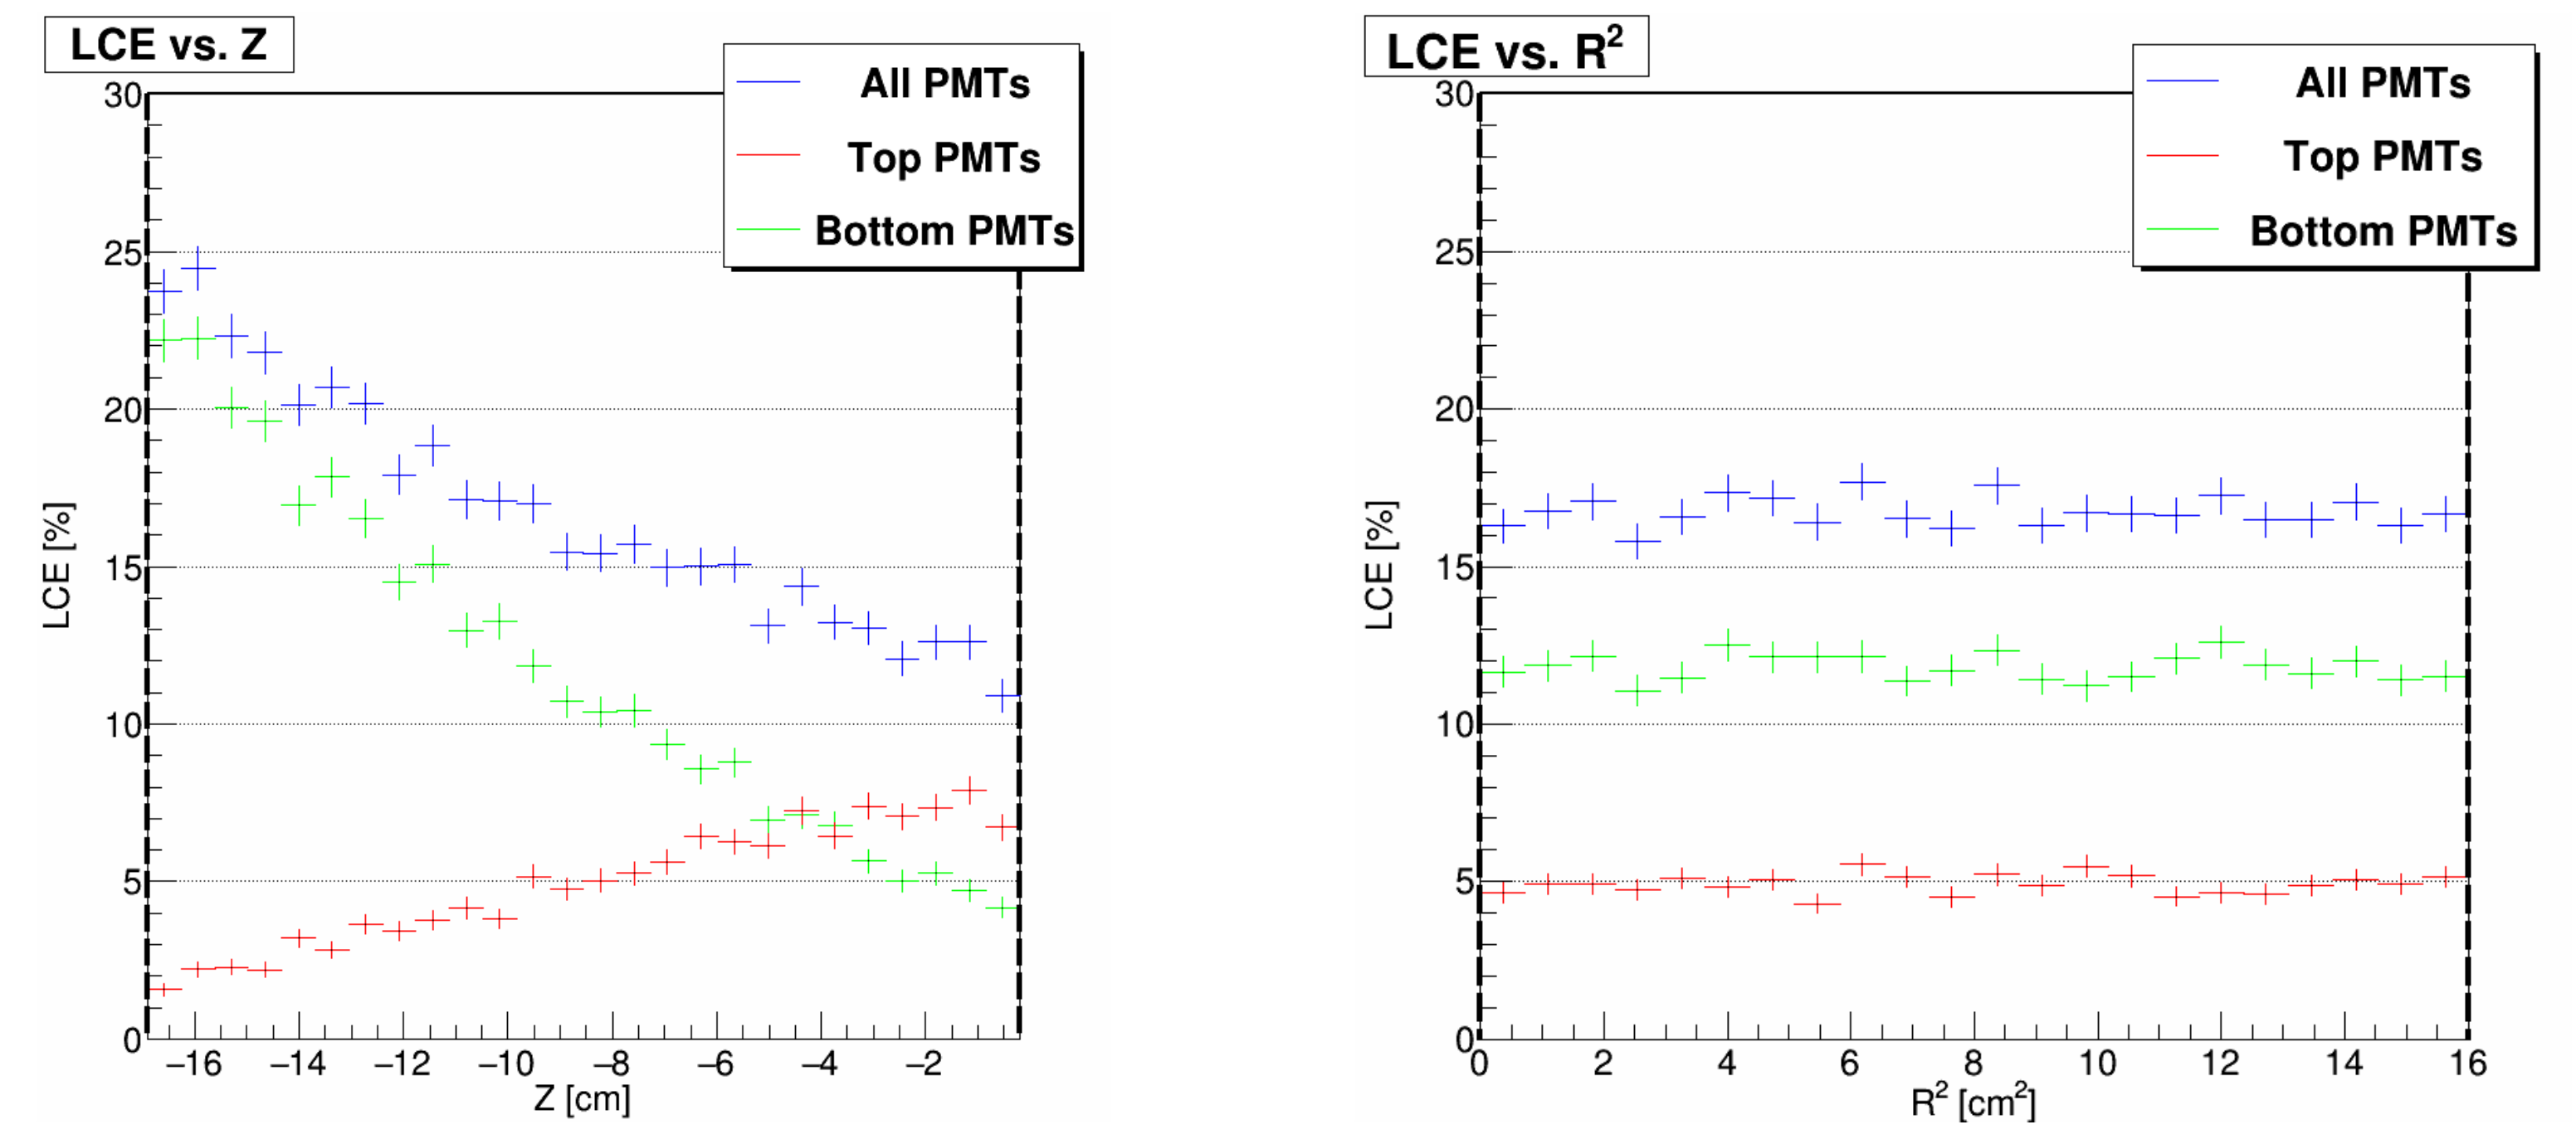

In [26]:
MC_file = './MC_MS_TPC/MC_MS_TPC_optPhot_S1_1e5.root'
bins = binning('26', '50', '22')
ROOT.gROOT.ProcessLine('.x ../src/optPhot_S1.cc++("'+MC_file+'",'+bins.z+','+bins.r+','+bins.rr+',"png")')
show([MC_file[:-5]+'_S1_rrZ_gen.png',MC_file[:-5]+'_S1_rrZ_det.png'], 'muensterTPC - 1e5 events (S1)')
show([MC_file[:-5]+'_S1_rrZ_LCE.png',MC_file[:-5]+'_S1_rrZ_LCE_top.png'])
show([MC_file[:-5]+'_S1_LCEz.png',MC_file[:-5]+'_S1_LCErr.png'])

Show the plotting log file:

In [50]:
S1_log = open(MC_file[:-5]+'_S1.dat', 'r')
S1_log_contents = S1_log.read()
print (S1_log_contents)
S1_log.close()

= reading datafile ===== single file =======================
 file: MC_MS_TPC_optPhot_S1_1e5.root 100000 events 
= geometry parameters ======================================
binning: 26 50 22
chamber_minZ: -18
chamber_maxZ: 0.5
chamber_minRR: 0
chamber_maxRR: 25
LXe_minZ: -16.9
LXe_maxZ: -0.2
LXe_minRR: 0
LXe_maxRR: 16
nbinsZ: 26
nbinsRR: 22
LCE_min: 0
LCE_max: 30
= analyse ttree ============================================
generated events: 100000
generated events (LXe): 100000
detected events (LXe): 16724
Mean LCE LXe(detected/generated): 16.724
------------------------------------------------------------
detected events (LXe TOP): 4921
Mean LCE LXe(detected TOP/generated): 4.921
AreaFractionTop LXe(detected TOP/detected ALL): 29.4248
------------------------------------------------------------
detected events (LXe BOTTOM): 11803
Mean LCE LXe(detected BOTTOM/generated): 11.803
AreaFractionBottom LXe(detected BOTTOM/detected ALL): 70.5752
= plot xy ====================================

# optPhot S2 analysis

Update incoming ...

In [5]:
MC_file = './MC_Xe_TPC/MC_Xe_TPC_optPhot_S2_1e5.root'
bins = binning('26', '50', '22')
ROOT.gROOT.ProcessLine('.x ../src/optPhot_S2.cc++("'+MC_file+'",'+bins.z+','+bins.r+','+bins.rr+',"png")')
#show([MC_file[:-5]+'_S1_rrZ_gen.png',MC_file[:-5]+'_S1_rrZ_det.png'])

0

In [6]:
S2_log = open(MC_file[:-5]+'_S2.dat', 'r')
S2_log_contents = S2_log.read()
print (S2_log_contents)
S2_log.close()
del S2_log_contents

= reading datafile ===== single file =======================
 file: MC_Xe_TPC_optPhot_S2_1e5.root 100000 events 
= geometry parameters ======================================
binning: 26 50 22
chamber_minZ: -140
chamber_maxZ: 6
chamber_minRR: 0
chamber_maxRR: 3600
GXe_minZ: -96.7
GXe_maxZ: 0
GXe_minRR: 0
GXe_maxRR: 2294.41
LCE_min: 0
LCE_max: 50
= analyse ttree ============================================
generated events: 100000
Top PMT hits: 22046
All PMT hits: 32602
AFT: 0.676216



# data maps

For plotting the data maps used in the matching macro.

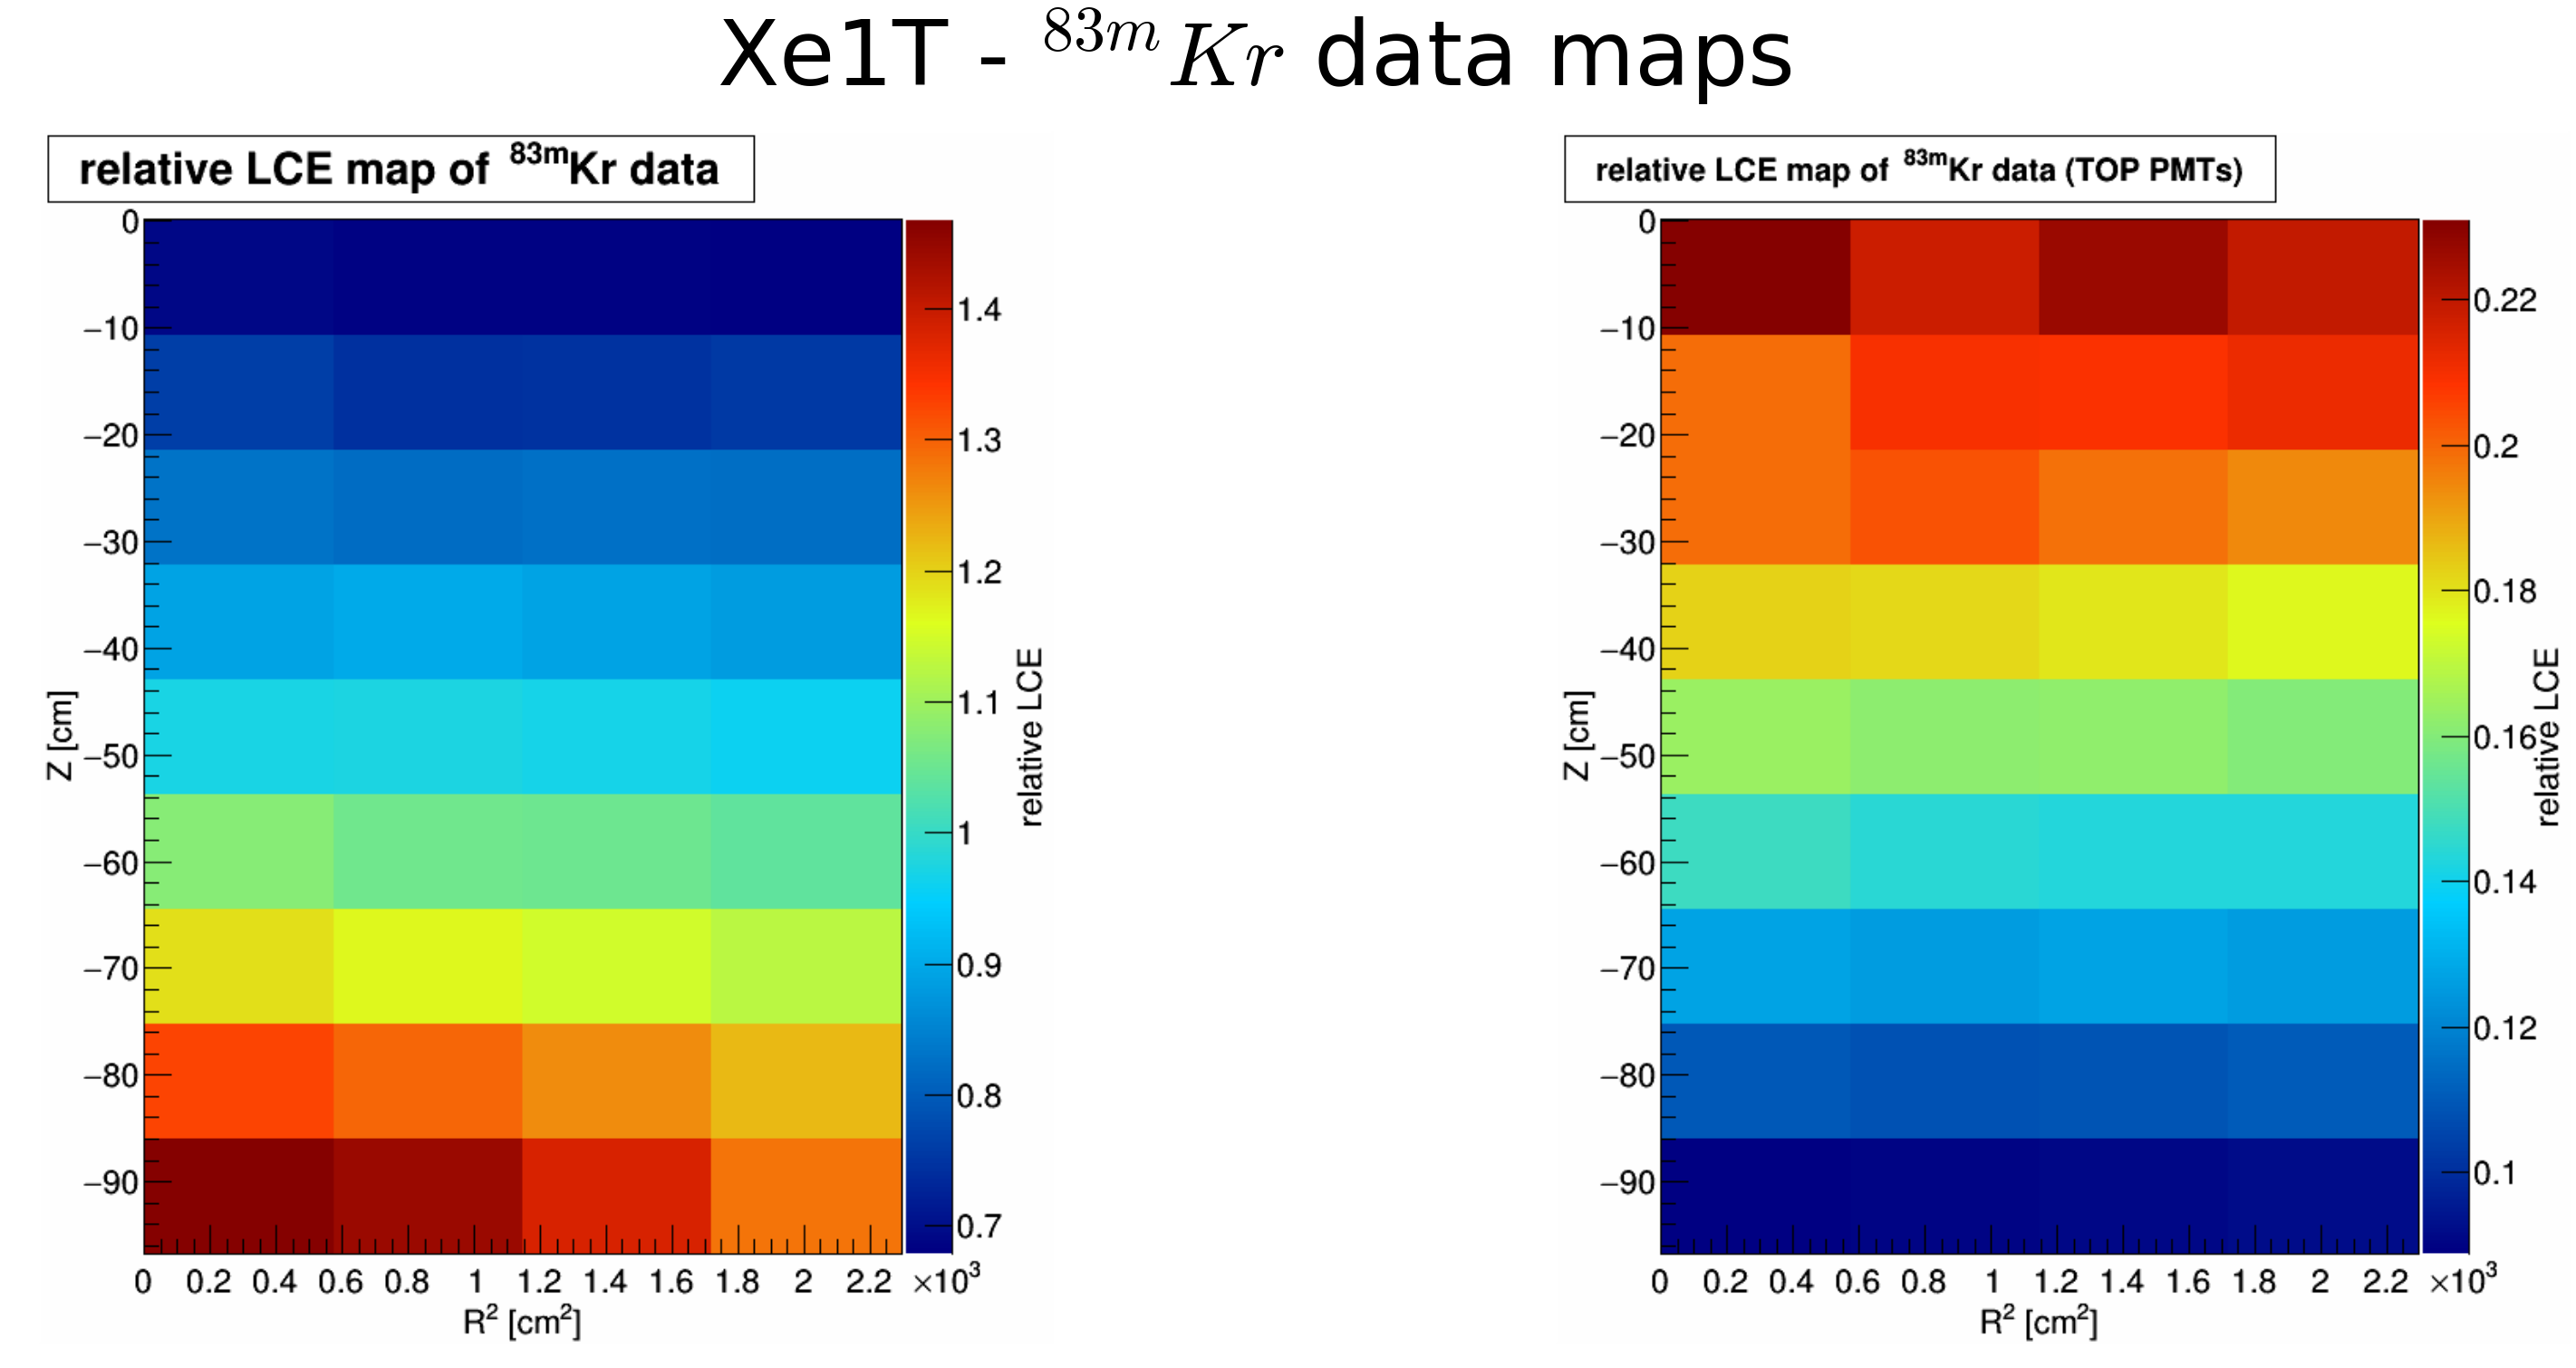

In [23]:
map_file = './data_maps/Xe_Kr83m.txt'
bins = binning('9', '4', '4')
ROOT.gROOT.ProcessLine('.x ../src/data_maps.cc++("'+map_file+'",'+bins.z+','+bins.r+','+bins.rr+',"png")')
show([map_file[:-4]+'_map_rLCE.png',map_file[:-4]+'_map_rLCE_top.png'],'Xe1T - $^{83m}Kr$ data maps')

# Comparison of MC vs. data map

| comparison | MC | data map |    
|----|----|----|  
| `*_AFTrr.png`           | `*_rrZ_MC_ly.png`          | `*_rrZ_Kr_ly.png`          |  
| `*_AFTz.png`            | `*_rrZ_MC_ly_top.png`      | `*_rrZ_Kr_ly_top.png`      |  
| `*_lyz.png`             | `*_rrZ_MC_ly_bottom.png`   | `*_rrZ_Kr_ly_bottom.png`   |  
| `*_rLCEz.png`           | `*_rrZ_MC_rLCE.png`        | `*_rrZ_Kr_rLCE.png`        |    
| `*_rrZ_ly.png`          | `*_rrZ_MC_rLCE_top.png`    | `*_rrZ_Kr_rLCE_top.png`    |  
| `*_rrZ_ly_top.png`      | `*_rrZ_MC_rLCE_bottom.png` | `*_rrZ_Kr_rLCE_bottom.png` |  
| `*_rrZ_ly_bottom.png`   |                            |                            |   
| `*_rrZ_rLCE.png`        |                            |                            |  
| `*_rrZ_rLCE_top.png`    |                            |                            |  
| `*_rrZ_rLCE_bottom.png` |                            |                            |  

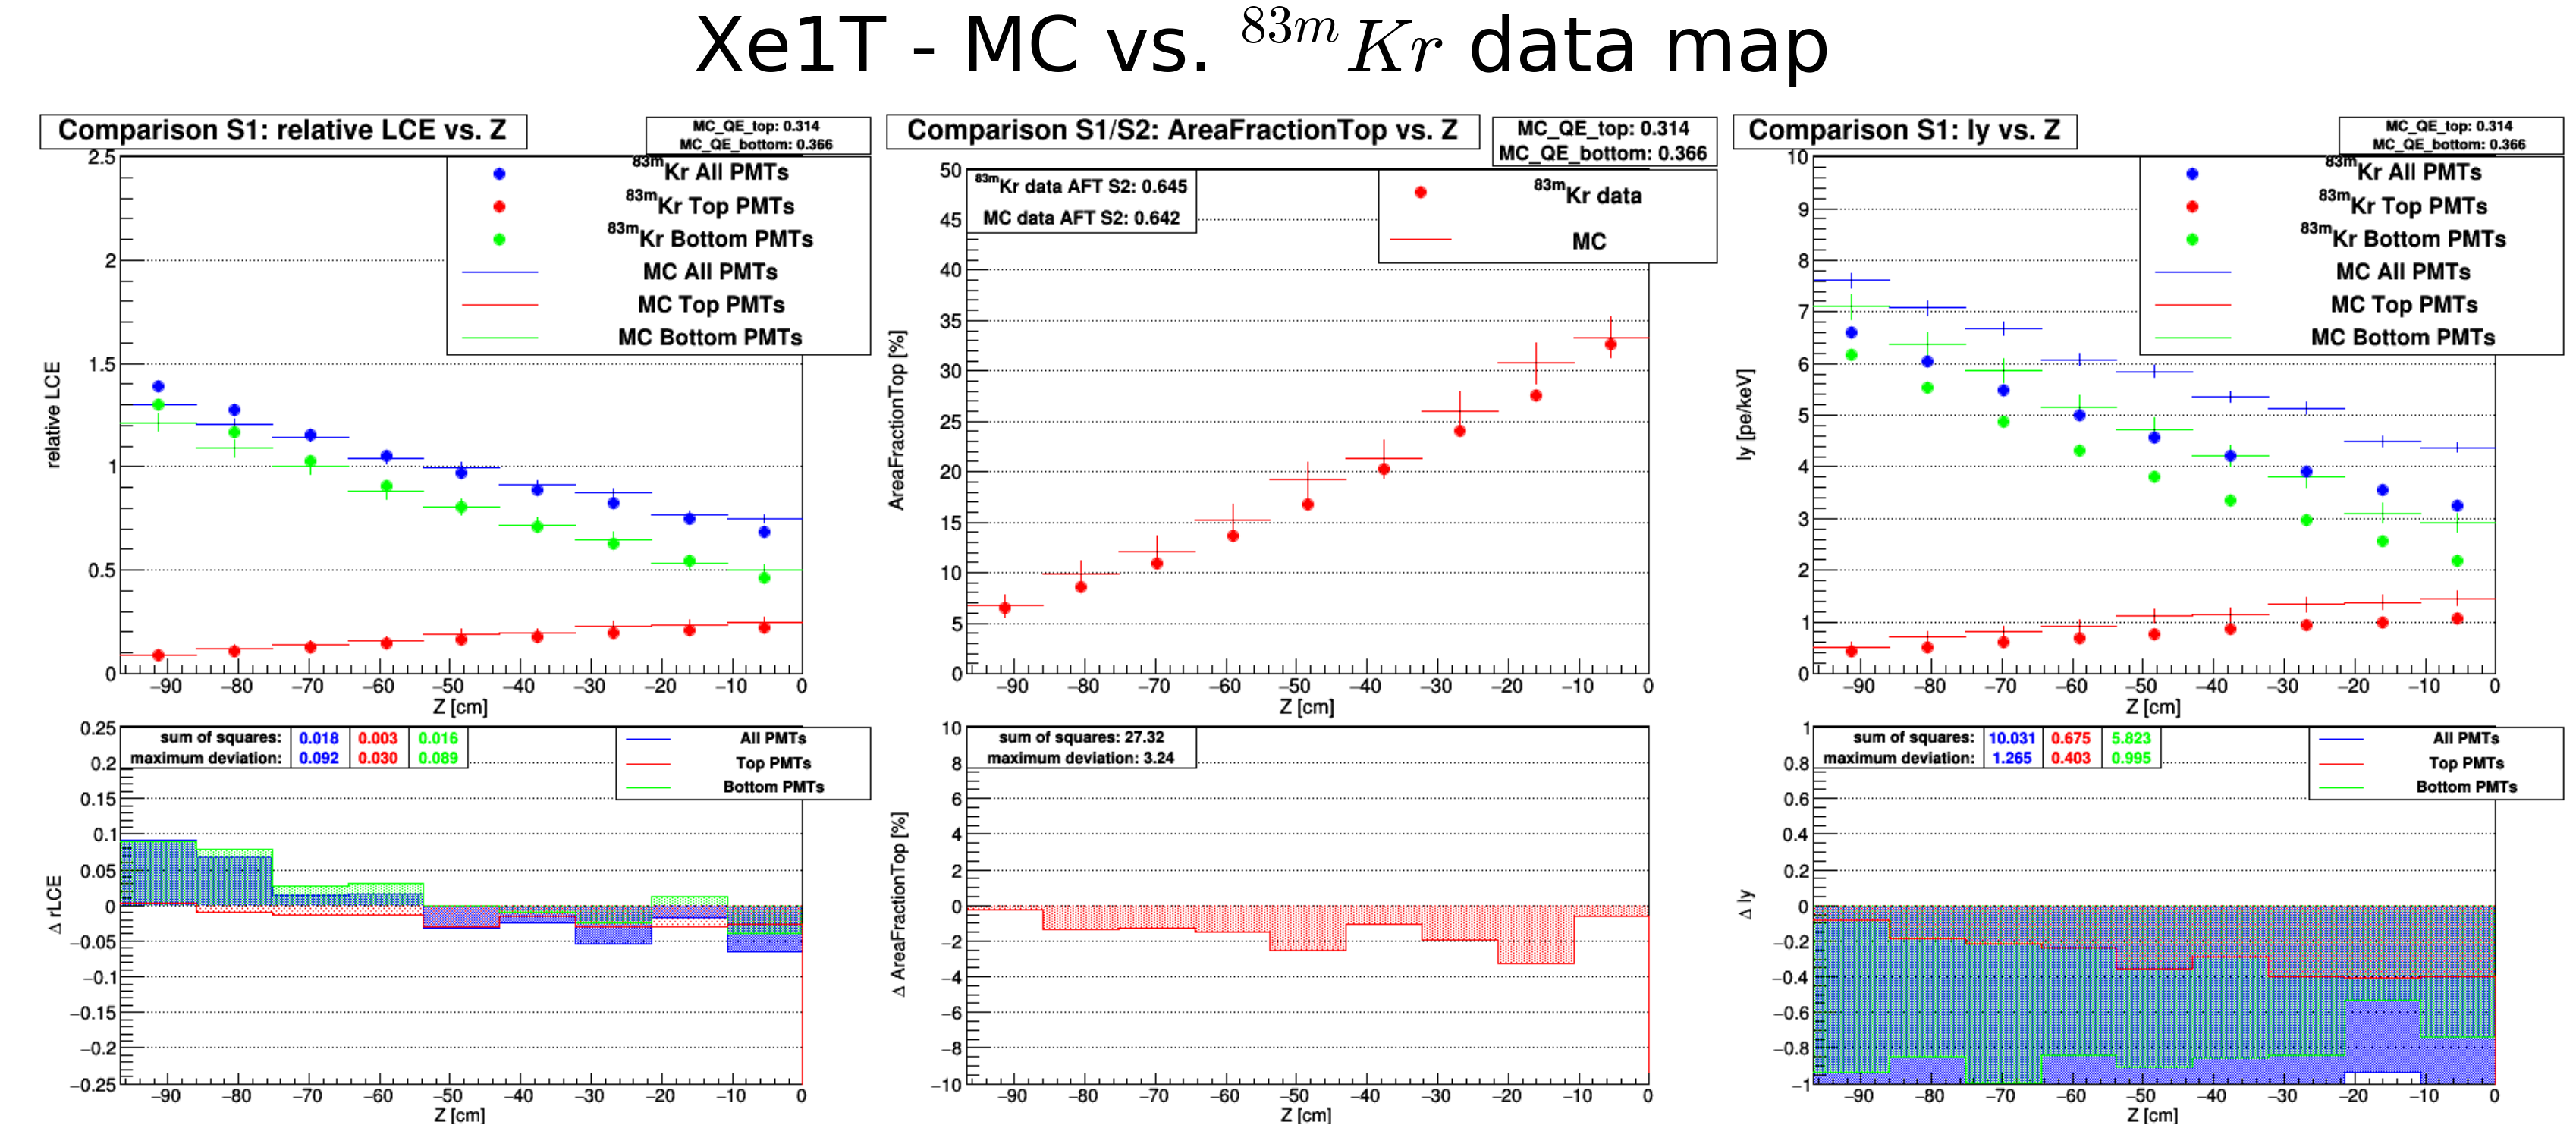

In [24]:
comparison_path = './comparison/'
map_file = 'Xe_Kr83m.txt'
MC_file = 'MC_Xe_TPC_optPhot_S1_1e5.root'
bins = binning('9', '4', '4')
theta_bins = '4 6 8 12'
data_AFT_S2 = '0.645'
ROOT.gROOT.ProcessLine('.x ../src/optPhot_comparison.cc++("'+comparison_path+map_file+'",'+data_AFT_S2+
                       ',"'+comparison_path+MC_file+'",'+bins.z+','+bins.r+','+bins.rr+',"'+theta_bins+'","png")')
show([comparison_path+'comparison_'+MC_file[:-5]+'_vs_'+map_file[:-4]+'_rLCEz.png',
      comparison_path+'comparison_'+MC_file[:-5]+'_vs_'+map_file[:-4]+'_AFTz.png',
      comparison_path+'comparison_'+MC_file[:-5]+'_vs_'+map_file[:-4]+'_lyz.png'],
     'Xe1T - MC vs. $^{83m}Kr$ data map')

# Matching MC vs. data maps 

# Calibration sources

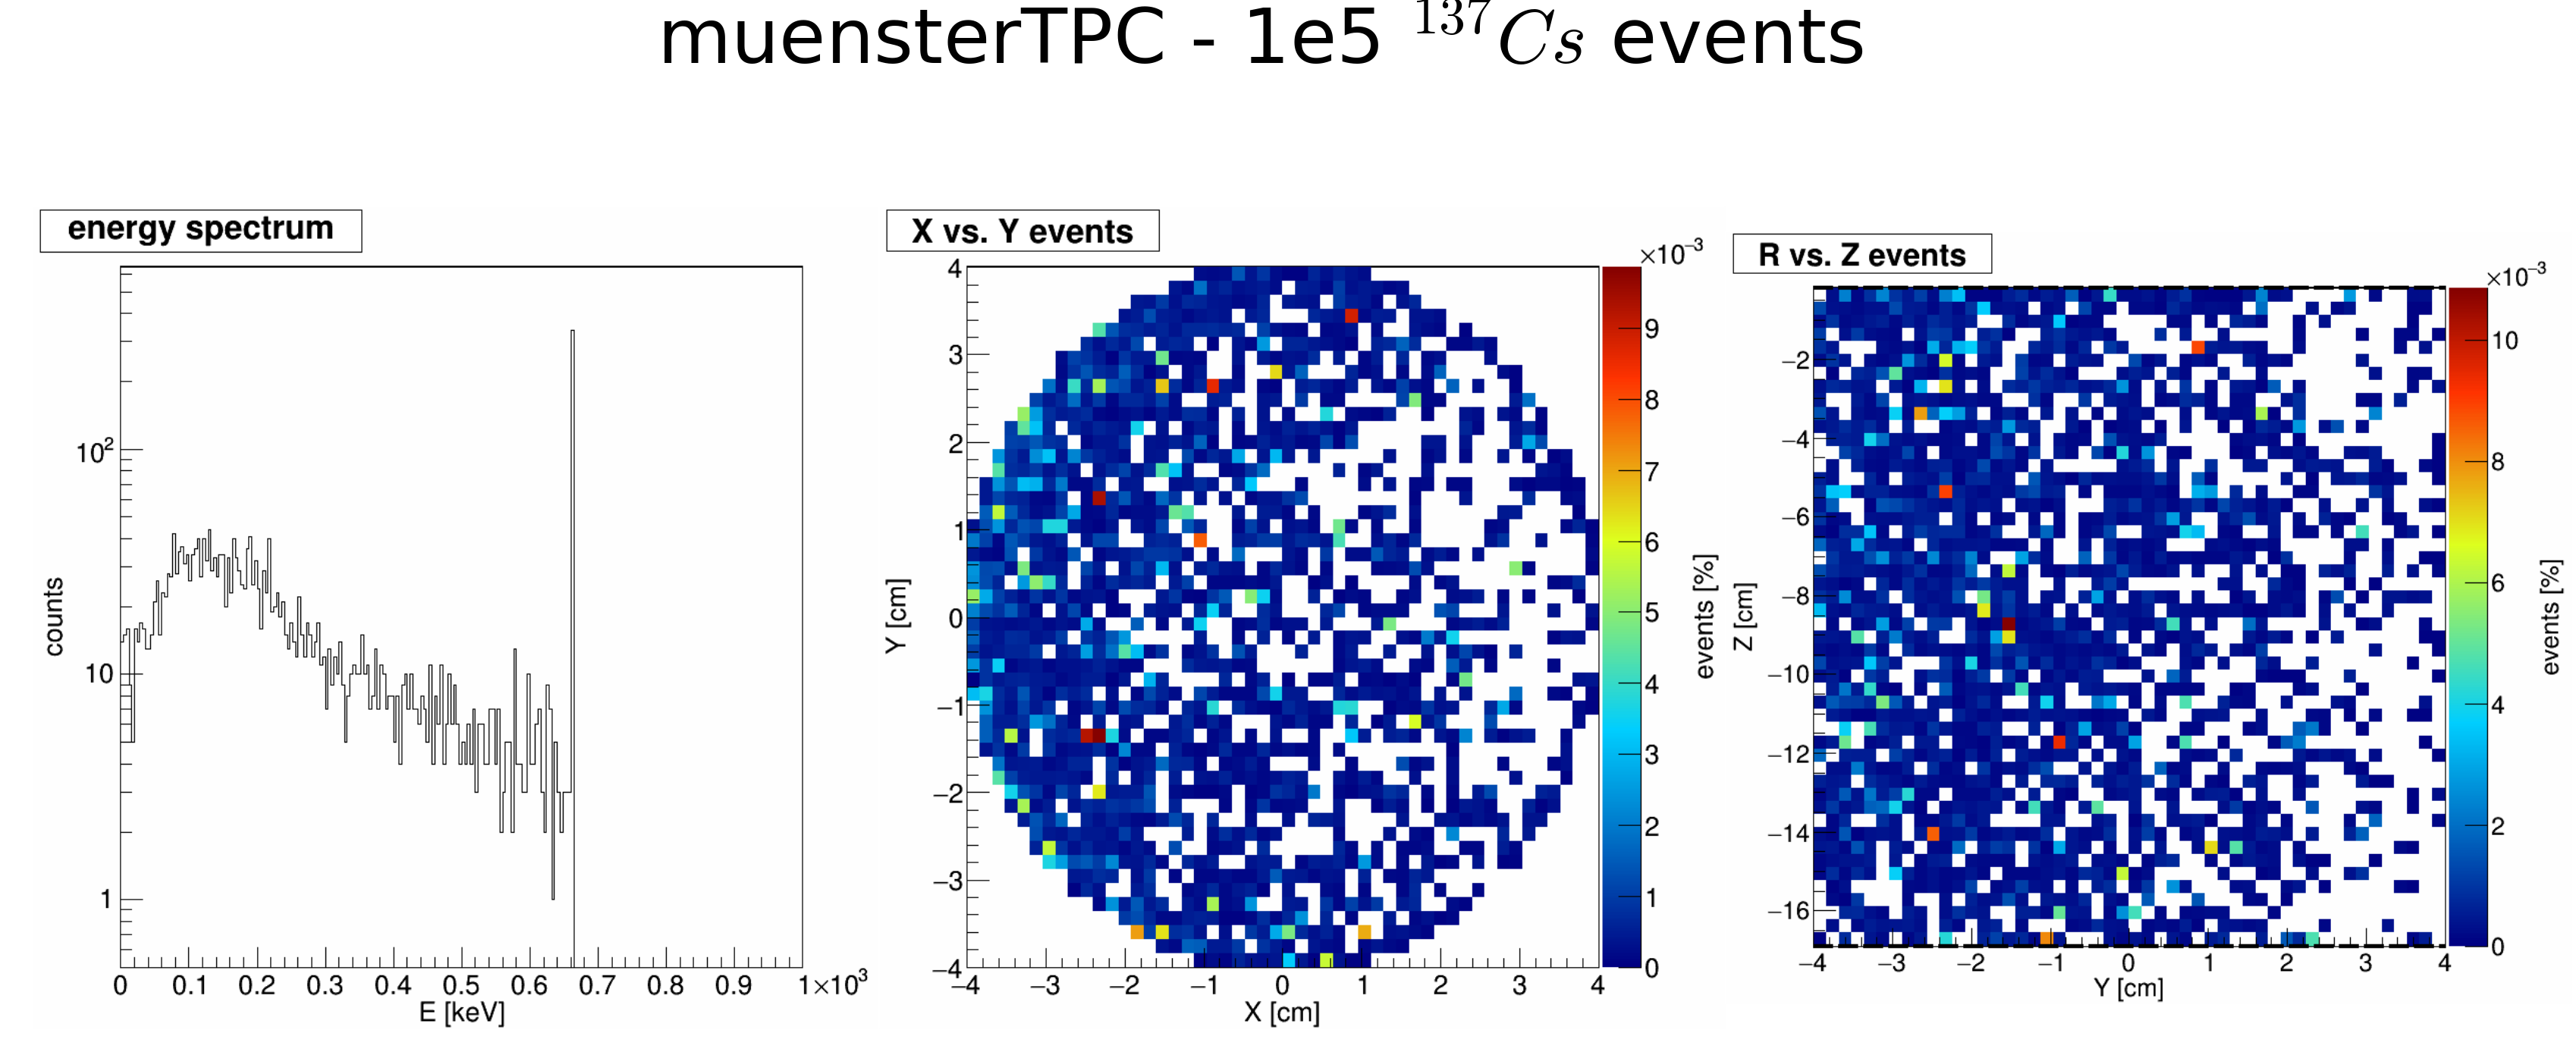

In [25]:
MC_file = './MC_MS_TPC/MC_MS_TPC_Cs137_1e5.root'
bins = binning('50', '50', '22')
ROOT.gROOT.ProcessLine('.x ../src/calibration_source.cc++("'+MC_file+'",'+bins.z+','+bins.r+','+bins.rr+',"png")')
show([MC_file[:-5]+'_calsource_spectrum.png',
      MC_file[:-5]+'_calsource_xy.png',
      MC_file[:-5]+'_calsource_yz.png',],
     'muensterTPC - 1e5 $^{137}Cs$ events')

In [ ]:
output_HTML(notebook_name)